# Text Mining Assignment 1
**Spring 2016**

Hope McIntyre (hm7zg)

In [1]:
# Base
import numpy as np
import pandas as pd
import json
import re
import string
from os import listdir
import math
# Natural Language Processing
import nltk
from nltk.stem.snowball import EnglishStemmer # load the stemmer module from NLTK
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
# iPython Notebook
from IPython.display import display, HTML
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

height has been deprecated.



In [2]:
# Disabling a display warning
pd.options.mode.chained_assignment = None

In [ ]:
# from TM1_Methods import load_json

In [3]:
# Set Working Directory
! pwd
# ! cd '/Users/hopeemac/Documents/Education/Classes/UVA MSDS/16S/Text Mining'

/Users/hopeemac/Documents/Education/Classes/UVA MSDS/16S/Text Mining


In [4]:
# Read in JSON

# Get File Names for Test and Train set
files_test = listdir('yelp/test')
files_train = listdir('yelp/train')

In [5]:
def load_json(fileList,filePath):
    dataDF = pd.DataFrame()
    for file in fileList:
        #json_data = open(filePath+file, encoding = "ISO-8859-1").read()
        json_data = open(filePath+file, errors = "ignore").read()
        data = json.loads(json_data)

        # Move Reviews only to DataFrame
        dataDF = dataDF.append(pd.DataFrame.from_dict(data['Reviews']))
        
    return dataDF
        # print(len(textDF))
        # print(class(textDF))
        # Append to Existing DF

In [ ]:
dataDF_train = load_json(files_train, 'yelp/train/')

text_train = dataDF_train['Content']
reviewID_train = dataDF_train['ReviewID']
print("Num of rows: ",len(text_train))

In [11]:
dataDF_test = load_json(files_test, 'yelp/test/')

# Extract Only Text Values in PD Series
text_test = dataDF_test['Content']
reviewID_test = dataDF_test['ReviewID']
print("Num of rows: ",len(text_test))

Num of words: 14298540
Num of rows:  19803


In [12]:
# Load Stopword List
stopwords = open('stopwords.txt', 'r').read().split()

In [13]:
# Get an instance of SnowballStemmer for English
stemmer = EnglishStemmer() 

### 1.1 - 1. Implementation of text normalization module.

In [14]:
def clean_words(text):
    tokenizer = nltk.tokenize.treebank.TreebankWordTokenizer()
    words = tokenizer.tokenize(text)

    # Convert to Lowercase
    # words = words.map(str.lower)
    cleanWords = [t.lower() for t in words]

    # Normalize (remove punctuation)
    # punc = string.punctuation
    # cleanWords = [t for t in cleanWords if t not in punc]
    cleanWords = [re.sub('[^0-9a-z]', "", x) for x in cleanWords]
    
    # Remove Empty Vectors
    cleanWords = [x for x in cleanWords if x != '']
 
    # Identify Digits & Convert to Num
    cleanWords = [re.sub("\d+", "NUM", x) for x in cleanWords]

    # Stem Words
    cleanWords = [stemmer.stem(x) for x in cleanWords] # call stemmer to stem the input
    
    return cleanWords

In [15]:
tokens_train = [clean_words(i) for i in text_train]

In [ ]:
def count_totalWords(textList):
    count = 0
    for l in textList:
        for word in l:
            count += 1
    return count

In [16]:
print("Num of words:" , count_totalWords(tokens_train))
print("Num of rows: ",len(tokens_train))

Num of words: 4948882
Num of rows:  38688


In [17]:
tokens_test = [clean_words(i) for i in text_test]

In [18]:
print("Num of words:" , count_totalWords(tokens_test))
print("Num of rows: ",len(tokens_test))

Num of words: 2667165
Num of rows:  19803


In [20]:
# Merge List of Vectors from Train and Test
tokens_total = tokens_train + tokens_test
# len(cleanText_total)

In [21]:
count_totalWords(tokens_total)

7616047

In [ ]:
# Clean Corpus = List of Lists of Tokens by Document, Cleaned
print(len(clean_corpus))
print(clean_corpus[0])

In [22]:
# Print CSV with Words
toBePrinted = pd.Series(tokens_total)
toBePrinted.to_csv("vocab.csv")

# 1.1 Zipf's Law

In [ ]:
# Calculate Total Term Frequency in all Documents

In [23]:
def term_freq(textList):
    TF = {}
    for row in textList:
        #print(row)
        for word in row:
            # print(word)
            if word in TF:
                TF[word] += 1
            else:
                TF[word] = 1
    return TF

In [48]:
TF_total = term_freq(tokens_total)

In [49]:
len(TF_total)

79948

In [50]:
TTF_DF = pd.DataFrame.from_dict(TF_total, orient = 'index')
TTF_DF = TTF_DF.sort(0, ascending = False)
TTF_DF.columns = ['TF']

In [51]:
TTF_DF['Rank'] = range(1, len(TTF_DF) + 1)

In [217]:
TTF_DF.to_csv("TTF.csv")

### 2. Zipf's Law Curve (Log-log space, with slope and intercept of the linear interpolation results)

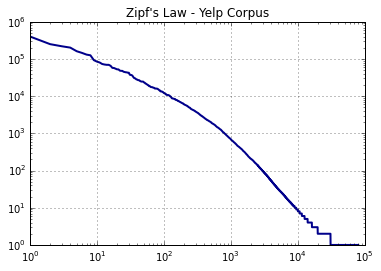

In [53]:
plt.figure()
plt.loglog(TTF_DF['Rank'],TTF_DF['TF'], 
          color='darkblue', 
          linewidth = 2)
plt.grid(True)
plt.title("Zipf's Law - Yelp Corpus")
plt.show()

# 1.2  Construct a Controlled Vocabulary

In [29]:
# Tokenized and Normalized Text from Train Data Set
#tokens_train
print("Num of words:" , count_totalWords(tokens_train))
print("Num of rows: ",len(tokens_train))

Num of words: 4948882
Num of rows:  38688


In [30]:
def create_bigram(textList):
    biGram_all = []
    for row in textList:
        biGram = []
        for i in range(1,len(row)):
            #print(i)
            #print(row[i-1]+"-"+row[i])
            biGram.append((row[i-1]+"-"+row[i]))
        biGram_all.append(biGram)
    return biGram_all

In [31]:
# Create Bigrams
bigrams_train = create_bigram(tokens_train)

In [32]:
print("Num of words:" , count_totalWords(bigrams_train))
print("Num of rows: ",len(bigrams_train))

Num of words: 4910197
Num of rows:  38688


In [33]:
# Remove Stop Words (From 1-grams)
def removeStopwords(text, stopwordList):
    newList = [t for t in text if t not in stopwordList]
    return newList

In [34]:
tokensClean_train = [removeStopwords(i, stopwords) for i in tokens_train]

In [36]:
print("Num of words:" , count_totalWords(tokensClean_train))
print("Num of rows: ",len(tokensClean_train))

Num of words: 2185850
Num of rows:  38688


In [37]:
# Remove Stop Words (From Bigrams)
def removeStopwords_bi(text, stopwordList):
    newList = [t for t in text if (t[:t.index("-")] not in stopwordList) & (t[t.index("-")+1:] not in stopwordList)]
    return newList

In [38]:
bigramsClean_train = [removeStopwords_bi(i, stopwords) for i in bigrams_train]

In [39]:
print("Num of words:" , count_totalWords(bigramsClean_train))
print("Num of rows: ",len(bigramsClean_train))

Num of words: 831785
Num of rows:  38688


In [43]:
# Add 1-grams and bigrams together
ngrams_train = []
for i in range(0,len(tokens_train)):
    ngrams_train.append(bigramsClean_train[i] + tokensClean_train[i])

In [58]:
print("Num of words:" , count_totalWords(ngrams_train))
print("Num of rows: ",len(ngrams_train))

Num of words: 3017635
Num of rows:  38688


In [56]:
# Initial controlled vocabulary (No Std Stopwords)
TF_train = term_freq(ngrams_train)

In [61]:
print("Size of Vocab: ",len(TF_train))

Size of Vocab:  372587


In [62]:
ti = pd.DataFrame.from_dict(TF_train, orient = 'index')
ti = ti.sort(0, ascending = False)
ti.columns = ['DF']

In [63]:
ti.to_csv("df.csv")

In [64]:
# Create TF for Each Doc (Aka Unique Words + Counts)
# Creates a Dictionary
def create_countVectors(tokens):
    doc_TF = {}
    for token in tokens:
        if token in doc_TF:
            doc_TF[token] += 1
        else:
            doc_TF[token] = 1
    return doc_TF

In [65]:
# Make Dictionary of Dictionaries for Training Set
countVectors_train = {}
for i in range(0,len(ngrams_train)):
    countVectors_train[reviewID_train.iloc[i]] = create_countVectors(ngrams_train[i])
    # doc_TF_all['doc0'].keys()

In [66]:
len(countVectors_train)

38684

In [ ]:
# Create a List of Sets of Unique Words in each Document
set_train = [set(x) for x in ngrams_train]

In [78]:
# Calculate DF in Corpus, Using each Unique Word that appears in the TF Dict
# Convert tokens_all to a set by set(list) before running through loop
DF_train = {}
for term in TF_train.keys():
    count = 0
    for i in range(0,len(ngrams_train)):
        if term in set_train[i]:
            count = count + 1
    DF_train[term] = count

In [74]:
# Create a 
print(len(ngrams_train[1]))
print(len(set(ngrams_train[1])))
set(ngrams_train[0])
set_train = [set(x) for x in ngrams_train]

213
160


In [81]:
DF_DF = pd.DataFrame.from_dict(DF_train, orient = 'index')
DF_DF = DF_DF.sort(0, ascending = False)
DF_DF.columns = ['DF']

In [82]:
DF_DF.to_csv("df.csv")

In [84]:
len(DF_train)

372587

### 1. List of new stopwords specific to restaurant reviews

In [93]:
# Create new Stopword List from Top 100 Terms by DF
DF_stopwords = DF_DF[0:100]
DF_stopwords.index

Index(['nt', 'place', 'good', 'food', 'num', 'great', 'order', 'time', 'tri',
       'veri', 'wait', 'realli', 'back', 'servic', 'love', 'friend', 'fri',
       'delici', 've', 'sauc', 'restaur', 'onli', 'eat', 'dish', 'tabl',
       'becaus', 'make', 'littl', 'menu', 'chees', 'definit', 'tast', 'amaz',
       'chicago', 'thing', 'nice', 'pretti', 'peopl', 'seat', 'night',
       'perfect', 'recommend', 'flavor', 'drink', 'bar', 'meal', 'price',
       'dinner', 'small', 'everyth', 'bit', 'favorit', 'worth', 'alway',
       'made', 'enjoy', 'chicken', 'side', 'long', 'experi', 'pizza', 'top',
       'fresh', 'befor', 'line', 'star', 'ca', 'serv', 'review', 'ca-nt',
       'give', 'lot', 'plate', 'll', 'day', 'atmospher', 'sweet', 'minut',
       'ani', 'tasti', 'someth', 'expect', 'sinc', 'staff', 'visit', 'feel',
       'special', 'mani', 'everi', 'reserv', 'french', 'lunch', 'awesom',
       'hour', 'salad', 'big', 'differ', 'end', 'high', 'excel'],
      dtype='object')

In [94]:
# Remove New DF Stop Words
master_train = [removeStopwords(i, DF_stopwords.index) for i in ngrams_train]

In [95]:
len(master_train)

38688

In [101]:
toPrint = pd.DataFrame(master_train)
toPrint.to_csv("spotCheck.csv")

In [87]:
# Filter out the N-grams with DF smaller than 50 instances
DF_tailwords = DF_DF[DF_DF['DF'] < 50]

In [96]:
DF_tailwords.index

Index(['pretti-close', 'poor-servic', 'musttri', 'rpm-italian', 'david',
       'meali', 'date-place', 'definit-check', 'lamp', 'sloppi-goat', 
       ...
       'abund-chang', 'cheap-spot', 'friesseat', 'homemad-tri', 'eager-server',
       'combinationfood-asid', 'dog-cocktail', 'major-discont',
       'restaurantth-restaur', 'deem-healthi'],
      dtype='object', length=368142)

In [97]:
master_train = [removeStopwords(i, DF_tailwords.index) for i in master_train]

In [98]:
len(master_train)

38688

### 2. The size of the resulting controlled vocabulary (i.e., total N-grams in it).

In [104]:
# Size of Controlled Vocabulary
# Recompute Term Frequency without New Stopwords and Tailwords
TF_train = {}
TF_train = term_freq(master_train)
print("Size of Final Controlled Vocabulary: ",len(TF_train))

Size of Final Controlled Vocabulary:  4345


### 3. Top & Bottom 50 N-grams according to DF and their corresponding IDFs

In [115]:
n_doc = len(tokens_train)
n_doc

38688

In [106]:
# Create a List of Sets of Unique Words in each Document
set_trainF = [set(x) for x in master_train]

In [107]:
DF_trainF = {}
for term in TF_train.keys():
    count = 0
    for i in range(0,len(master_train)):
        if term in set_trainF[i]:
            count = count + 1
    DF_trainF[term] = count

In [ ]:
DF_DF_F = pd.DataFrame.from_dict(DF_trainF, orient = 'index')
DF_DF_F = DF_DF_F.sort(0, ascending = False)
DF_DF_F.columns = ['DF']

In [125]:
#calc_IDF()
for i in range(0,len(DF_DF_F)):
    DF_DF_F['IDF'][i] = 1 + math.log((n_doc/DF_DF_F['DF'][i]))

In [126]:
# Top 50 Words by DF
DF_DF_F[0:50]

,DF,IDF
bread,2943,3.576100
wine,2914,3.586003
bad,2903,3.589785
meat,2889,3.594619
pork,2882,3.597045
hot,2882,3.597045
server,2870,3.601217
probabl,2859,3.605058
disappoint,2854,3.606808
share,2816,3.620212


In [128]:
# Top 50 Words by DF
DF_DF_F[(len(DF_DF_F)-50):len(DF_DF_F)]

,DF,IDF
style-deep,50,7.651262
eat-everyth,50,7.651262
num-top,50,7.651262
final-seat,50,7.651262
journey,50,7.651262
beard,50,7.651262
sound-good,50,7.651262
border,50,7.651262
fantast-servic,50,7.651262
num-price,50,7.651262


# 1.3 Compute Similarity Between Documents

In [129]:
# Read in Validation Data Set - Query.Json
data_val = load_json(['query.json'],'yelp/')

In [130]:
text_val = data_val['Content']
reviewID_val = data_val['ReviewID']

In [131]:
# Pre-Process Text (Remove Punc, Remove Stopwords Std.)
tokens_val = [clean_words(i) for i in text_val]
len(tokens_val)

5

In [132]:
# Create Bigrams and Add to List
bigrams_val = create_bigram(text_val)
len(bigrams_val)

5

In [133]:
ngrams_val = []
for i in range(0,len(tokens_val)):
    ngrams_val.append(bigrams_val[i] + tokens_val[i])
len(ngrams_val)

5

In [134]:
# tokens_val[0]
# Make Dictionary of Dictionaries for Validation Set
doc_TF_val = {}
for i in range(0,len(tokens_val)):
    doc_TF_val[reviewID_val.iloc[i]] = create_countVectors(tokens_val[i])
    # doc_TF_all['doc0'].keys()

In [135]:
# Make Dictionary of Dictionaries for Test Set
doc_TF_test = {}
for i in range(0,len(tokens_test)):
    doc_TF_test[reviewID_test.iloc[i]] = create_countVectors(tokens_test[i])
    # doc_TF_all['doc0'].keys()

In [136]:
len(doc_TF_test)

19801

In [ ]:
review = '1234567890123'
doc_TF_val[review].keys()
#DF['salmon']
TF_scaled_val[review]

In [150]:
# Calculate TF with Sub-linear TF scaling
TF_scaled_val = {}
for review in doc_TF_val.keys():
    TF_scaled_val[review] = {}
    for key in doc_TF_val[review].keys():
        TF_scaled_val[review][key] = (1 + math.log(doc_TF_val[review][key]))

In [152]:
# Calculate TF-IDF
scaled_val = {}
for review in doc_TF_val.keys():
    scaled_val[review] = {}
    for key in doc_TF_val[review].keys():
        if key in DF_trainF.keys():
            scaled_val[review][key] = TF_scaled_val[review][key] * (1 + math.log((n_doc/DF_trainF[key])))
        else:
            scaled_val[review][key] = TF_scaled_val[review][key]

In [153]:
# Calculate TF with Sub-linear TF scaling for Test Documents
TF_scaled_test = {}
for review in doc_TF_test.keys():
    TF_scaled_test[review] = {}
    for key in doc_TF_test[review].keys():
        TF_scaled_test[review][key] = (1 + math.log(doc_TF_test[review][key]))

In [154]:
# Calculate TF-IDF
scaled_test = {}
for review in doc_TF_test.keys():
    scaled_test[review] = {}
    for key in doc_TF_test[review].keys():
        if key in DF_trainF.keys():
            scaled_test[review][key] = TF_scaled_test[review][key] * (1 + math.log((n_doc/DF_trainF[key])))
        else:
            scaled_test[review][key] = TF_scaled_test[review][key]

In [ ]:
doc_TF_DF = pd.DataFrame.from_dict(doc_TF_val, orient = 'index')
doc_TF_DF

In [ ]:
# Calculate IDF
IDF_scaled_val = {}
for review in doc_TF_val.keys():
    TF_scaled_val[review] = {}
    for key in doc_TF_val[review]:
        TF_scaled_val[review][key] = 1 + math.log(doc_TF_val[review][key])

In [ ]:
IDF = 1 + math.log((n_doc/DF_trainF[key]))

In [164]:
toPrint = pd.DataFrame.from_dict(scaled_val)
toPrint.to_csv("spotCheck.csv")

In [ ]:
# Read in Validation Data Set - Query.Json
data_val = load_json(['query.json'],'yelp/')

In [ ]:
# Compute Cosine Similarity as Matrix? Reviews by Reviews
doc1 = doc_TF_val['1234567890123']
doc2 = doc_TF_val['C0XcD26vEKq0qiXddRG0uA']

In [ ]:
len(doc2)

In [ ]:
keys = ['q','w','e']

a = ['q','w', 'w']
b = ['q','w']
c = ['q','w','e']
docs = [a,b,c]
DF = {}
for term in keys:
    count = 0
    for i in range(0,3):
        if term in set(docs[i]):
            count = count + 1
    DF[term] = count

In [194]:
text_test[reviewID_test == "VOYaV7BNSAyKYcNsI7yeAA"]

1466    !!!!!!!!
Name: Content, dtype: object

In [193]:
reviewID_test.iloc[1466]

'TyMMMkZw7yODteAS-ttO8A'

In [ ]:
doc1 = doc_TF_val['1234567890123']
doc2 = doc_TF_val['C0XcD26vEKq0qiXddRG0uA']

### 1. Implementation of cosine similarity computation

In [155]:
# Calculates the Norm of Doc1 Vector
def calc_norm(vecDict):
    norm = 0
    for value in vecDict.values():
        #print(key, value)
        norm = norm + value**2
        #print(tot)
    norm = math.sqrt(norm)
    return norm

In [156]:
# Check if 2 docs have any words in common (Intersection), if not Dot Product = 0
# Calculate Dot Product for only common words
def calc_dotProd(vecDict1,vecDict2):
    totDot = 0
    comWords = set(vecDict1.keys() & vecDict2.keys())
    for word in comWords:
        vec1_count = vecDict1[word]
        vec2_count = vecDict2[word]
        totDot = totDot + (vec1_count * vec2_count)
    return totDot

In [157]:
# Calculate Cosine Distance
def calc_cosineDist(vecDict1,vecDict2):
    dist = calc_dotProd(vecDict1,vecDict2)/(calc_norm(vecDict1) * calc_norm(vecDict2))
    return dist

In [158]:
# Create Empty Dataframe to Hold Cosine Values
DF = pd.DataFrame(index = reviewID_test, columns = reviewID_val)

In [ ]:
# Calculate all Cosine Distances (Complete Matrix)
for review_val in reviewID_val:
    for review_test in reviewID_test:
        print(review_val, " - ",review_test)
        try:
            DF.ix[review_test, review_val] = calc_cosineDist(scaled_val[review_val], scaled_test[review_test])
        except ZeroDivisionError:
            DF.ix[review_test, review_val] = 0
            continue

In [198]:
DF.ix[0,0]

0.0648437705872402

### 2. Top 3 most similar review documents 

In [286]:
for i in reviewID_val:
    sortedDF = DF.sort(i, ascending = False)
    top3_reviewIDs = sortedDF.ix[0:3,i].index.values
    top3_dist = sortedDF.ix[0:3,i].values
    top3_data_subset = dataDF_test.loc[dataDF_test['ReviewID'].isin(top3_reviewIDs),:]
    top3_data_subset['Cosine Dist'] = top3_dist
    print("Validation Review #"+i  + "is most similar to: ")
    display(top3_data_subset)
    top3_data_subset['Content'].to_csv("top3"+i+".csv")

Validation Review #C0XcD26vEKq0qiXddRG0uAis most similar to: 


,Author,Author_Location,Content,Date,Overall,ReviewID,Cosine Dist
39,Cassie V.,"Chicago, IL","Ahhh tapas, the small plates that contain indi...",2014-05-20,4.0,C0XcD26vEKq0qiXddRG0uA,1
1033,Elizabeth A.,"Chicago, IL","First off, I am giving 4 stars because I think...",2011-10-25,4.0,CbMVsaLzVEC5iMNLuDumsg,0.410175
1829,Steve R.,"Skokie, IL",Great Tapas. The Sangria was very nice. Serv...,2011-10-17,4.0,8V5jppyc_HuM_9Dq7KFmGg,0.3856752


Validation Review #12345678901is most similar to: 


,Author,Author_Location,Content,Date,Overall,ReviewID,Cosine Dist
532,Annie D.,"Chicago, IL","Oh, yum. I had a wonderful meal here last week...",2011-10-17,4.0,fmX9HCcwLMpuw94TkTJynw,0.2509326
986,Ashley K.,"Chicago, IL",I've been waiting for some time to finally mak...,2011-11-02,4.0,CnihcVy_LFY0kz3K2Fmskw,0.2430643
1208,Meg E.,"Chicago, IL",pretty damn good. the service was not up to my...,2011-10-10,4.0,GOAFFOfllmjltJXfLSy5sQ,0.239819


Validation Review #123456789012is most similar to: 


,Author,Author_Location,Content,Date,Overall,ReviewID,Cosine Dist
702,Jacob K.,"Chicago, IL",I went here at the insistence of a friend to f...,2011-08-05,2.0,P-mgRIsQNSFZU2URLIGfag,0.3421191
1594,Sharad K.,"Jersey City, NJ",The best tacos you'll ever have.,2011-07-04,5.0,dahkJE2VmmwB3A-JIh9AFQ,0.3260673
1825,Julie S.,"Chicago, IL",pork with pineapple taco and tilapia taco were...,2011-10-15,4.0,zljALNSXSYwBTYCQ8zzc3Q,0.3220851


Validation Review #1234567890123is most similar to: 


,Author,Author_Location,Content,Date,Overall,ReviewID,Cosine Dist
552,Gloria H.,"San Francisco, CA",Had dinner there but probably should have trie...,2007-07-11,3.0,bvF17yVPs5DSre_xm4_2iA,0.2527061
222,Angela H.,"Berkeley, CA","Alinea may as well be called ""Alien-a"" because...",2011-03-19,5.0,TTceZdnesmTC3HkLZ_wmkA,0.2407626
841,Swarup B.,"San Francisco, CA",best.dining.experience.ever.the service was ex...,2009-09-17,5.0,4tCrRDiGCmdSwjvXfyv7FQ,0.2223582


Validation Review #12345678901234is most similar to: 


,Author,Author_Location,Content,Date,Overall,ReviewID,Cosine Dist
201,Oluwatope F.,"Rancho Cucamonga, CA",Good just expensive. We got carry out so that ...,2014-04-23,4.0,oeA78yFEk-XhiOuqqfnLfA,0.4145494
1940,Erica I.,"Chicago, IL",The mac and cheese and peach cobbler were the ...,2011-12-03,4.0,n3ijOZ4PMH6Nh7gZOpy91g,0.4123808
2251,Greg W.,"Chicago, IL","Smoque BBQ has excellent food! The ribs, chic...",2011-07-09,5.0,gtTf9HRpBG0psMoXpKHc5g,0.3877515


### 3. What type of restaurants are specified in the query.json file (e.g., Indian food or Korean food)?

A: The Restaurants in the Validation Set seem likely from a seafood restaurants, mostly specializing in food like Lobster rolls, oysters, and clams, etc.